<a href="https://colab.research.google.com/github/girishprabu/Curneu-Assessment/blob/main/Heart%20Disease%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

db= pd.read_csv('D:/Q17/SD03Q017/heart_failure_clinical_records_dataset.csv')

In [ ]:
db.head

<bound method NDFrame.head of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_cr

In [ ]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
db_copy = db.copy(deep = True)
db_copy[['anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_creatinine','serum_sodium','sex','smoking','time']] = db_copy[['anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_creatinine','serum_sodium','sex','smoking','time']].replace(0,np.NaN)

In [ ]:
print(db_copy.isnull().sum())

age                           0
anaemia                     170
creatinine_phosphokinase      0
diabetes                    174
ejection_fraction             0
high_blood_pressure         194
platelets                     0
serum_creatinine              0
serum_sodium                  0
sex                         105
smoking                     203
time                          0
DEATH_EVENT                   0
dtype: int64


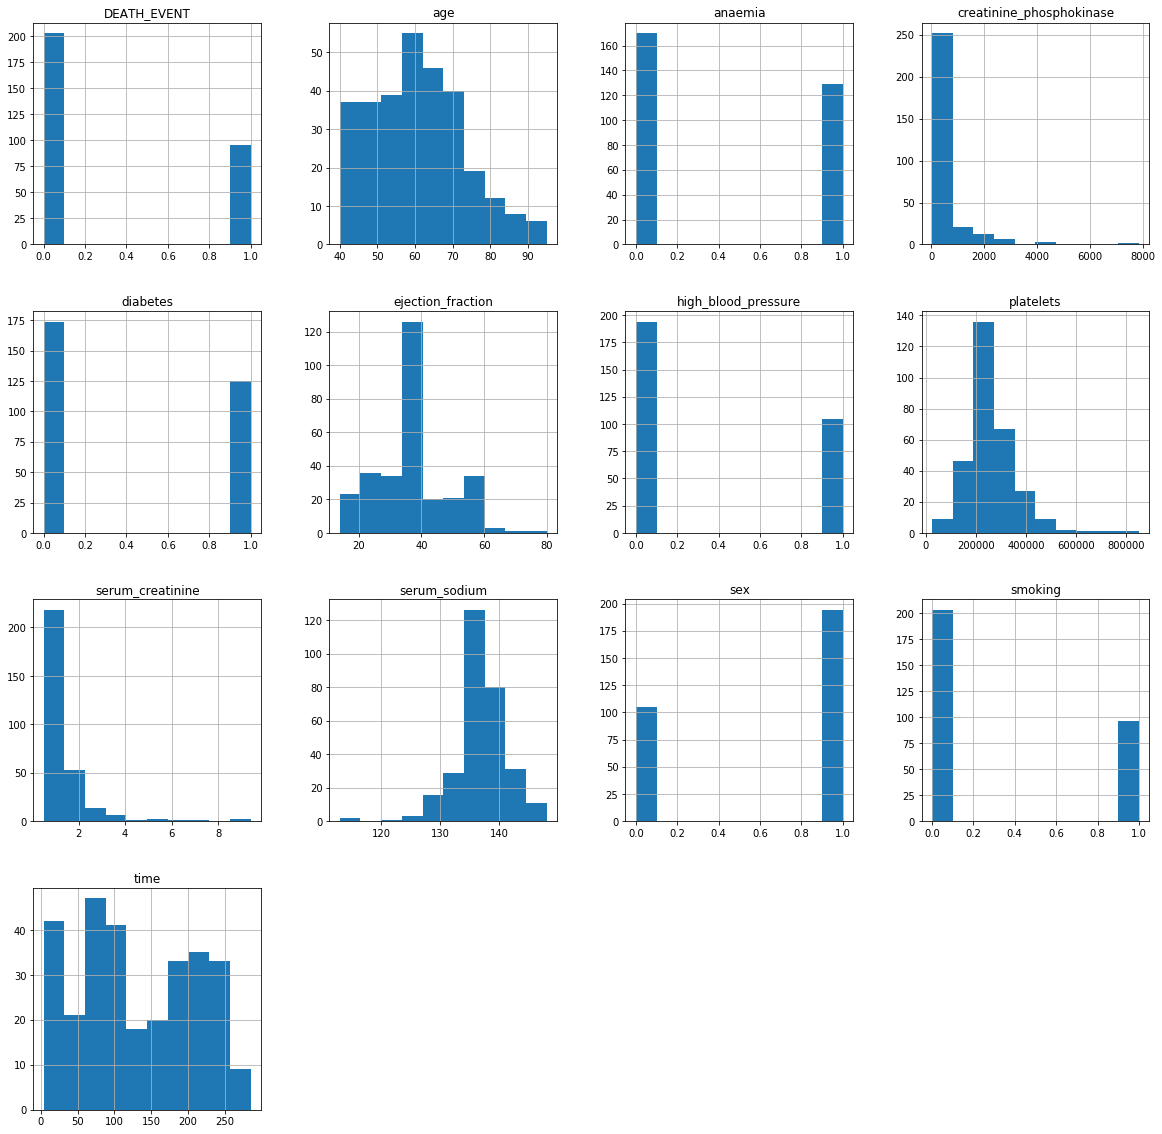

In [ ]:
p = db.hist(figsize = (20,20))

In [ ]:
db_copy['anaemia'].fillna(db_copy['anaemia'].mean, inplace = True)

In [ ]:
db_copy['diabetes'].fillna(db_copy['diabetes'].mean(), inplace = True)

In [ ]:
db_copy['high_blood_pressure'].fillna(db_copy['high_blood_pressure'].mean(), inplace = True)

In [ ]:
db_copy['sex'].fillna(db_copy['sex'].mean(), inplace = True)

In [ ]:
db_copy['smoking'].fillna(db_copy['smoking'].mean(), inplace = True)

In [ ]:
print(db_copy.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


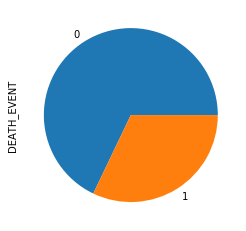

In [ ]:
db.DEATH_EVENT .value_counts().plot(kind="pie")

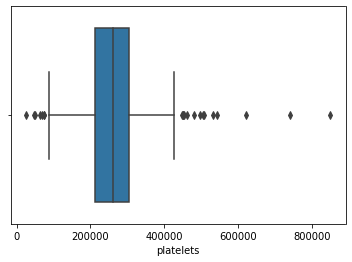

In [ ]:
import seaborn as sns
sns.boxplot(x=db["platelets"])

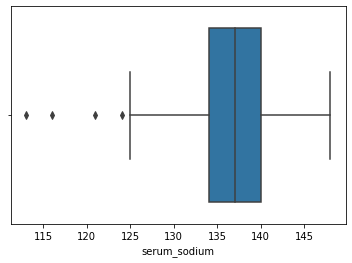

In [ ]:
sns.boxplot(x=db["serum_sodium"])

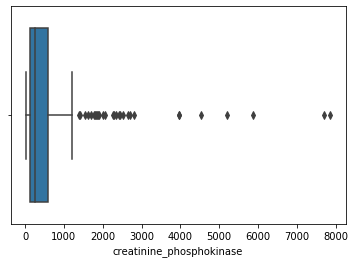

In [ ]:
sns.boxplot(x=db["creatinine_phosphokinase"])

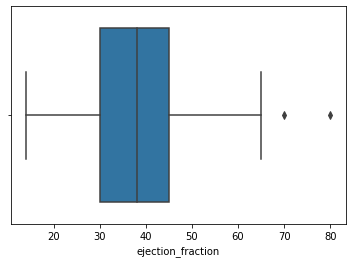

In [ ]:
sns.boxplot(x=db["ejection_fraction"])

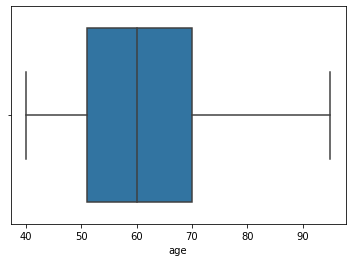

In [ ]:
sns.boxplot(x=db["age"])

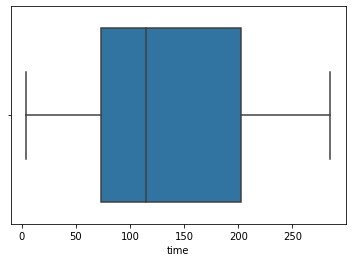

In [ ]:
sns.boxplot(x=db["time"])

# REMOVING OUTLIERS

In [ ]:
Q1 = db["platelets"].quantile(0.25)
Q3 = db["platelets"].quantile(0.75)
IQR = Q3 - Q1
db["platelets"] = db["platelets"][~((db["platelets"] < (Q1 - 1.5 * IQR)) |(db["platelets"] > (Q3 + 1.5 * IQR)))]

In [ ]:
Q1 = db["serum_sodium"].quantile(0.25)
Q3 = db["serum_sodium"].quantile(0.75)
IQR = Q3 - Q1
db["serum_sodium"] = db["serum_sodium"][~((db["serum_sodium"] < (Q1 - 1.5 * IQR)) |(db["serum_sodium"] > (Q3 + 1.5 * IQR)))]

In [ ]:
Q1 = db["creatinine_phosphokinase"].quantile(0.25)
Q3 = db["creatinine_phosphokinase"].quantile(0.75)
IQR = Q3 - Q1
db["creatinine_phosphokinase"] = db["creatinine_phosphokinase"][~((db["creatinine_phosphokinase"] < (Q1 - 1.5 * IQR)) |(db["creatinine_phosphokinase"] > (Q3 + 1.5 * IQR)))]

In [ ]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  270 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 278 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              295 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 30.5 KB


In [ ]:
db.dropna(subset = ["platelets","serum_sodium","creatinine_phosphokinase"], inplace=True)
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       248 non-null    float64
 1   anaemia                   248 non-null    int64  
 2   creatinine_phosphokinase  248 non-null    float64
 3   diabetes                  248 non-null    int64  
 4   ejection_fraction         248 non-null    int64  
 5   high_blood_pressure       248 non-null    int64  
 6   platelets                 248 non-null    float64
 7   serum_creatinine          248 non-null    float64
 8   serum_sodium              248 non-null    float64
 9   sex                       248 non-null    int64  
 10  smoking                   248 non-null    int64  
 11  time                      248 non-null    int64  
 12  DEATH_EVENT               248 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 27.1 KB


In [ ]:
scaler = StandardScaler()
db.iloc[:,:-1] = scaler.fit_transform(db.iloc[:,:-1])

In [ ]:
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] = mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
def main() : 
      
    # Importing dataset 
      
     
  
    X = db.iloc[:,:-1].values 
  
    Y = db.iloc[:,-1:].values 
      
    # Splitting dataset into train and test set 
  
    X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 1/3, random_state = 0 ) 
      
    # Model training 
      
    model = K_Nearest_Neighbors_Classifier( K = 3 ) 
      
    model.fit( X_train, Y_train ) 
      
    model1 = KNeighborsClassifier( n_neighbors = 3 ) 
      
    model1.fit( X_train, Y_train ) 
      
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
    Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
      
    correctly_classified = 0
      
    correctly_classified1 = 0
      
    # counter 
      
    count = 0
      
    for count in range( np.size( Y_pred ) ) : 
          
        if Y_test[count] == Y_pred[count] : 
              
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] : 
              
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", (  
      correctly_classified / count ) * 100 ) 
    print( "Accuracy on test set by sklearn model   :  ", (  
      correctly_classified1 / count ) * 100 ) 
    
      

In [ ]:
if __name__ == "__main__" :  
      
    main()

Accuracy on test set by our model       :   75.90361445783132
Accuracy on test set by sklearn model   :   75.90361445783132


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
